In [14]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [15]:
df = pd.read_csv('EPL_Soccer_MLR_LR.csv')
df.head()

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60.0,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68.0,20.67,102.8,58.55,189.7,74.4,21.30
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21.0,21.86,104.6,55.36,177.8,69.1,19.88
3,"McCarthy, Mr. Timothy J",MUN,4.11,5.3,37.3,12.6,69.0,21.88,126.4,57.18,185.0,74.9,23.66
4,"Palsson, Master. Gosta Leonard",MUN,4.45,6.8,41.5,14.0,29.0,18.96,80.3,53.20,184.6,64.6,17.64


In [16]:
df = df.drop(['Club','PlayerName'], axis=1)

In [17]:
df.shape

(217, 11)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DistanceCovered(InKms)  202 non-null    float64
 1   Goals                   202 non-null    float64
 2   MinutestoGoalRatio      202 non-null    float64
 3   ShotsPerGame            202 non-null    float64
 4   AgentCharges            202 non-null    float64
 5   BMI                     202 non-null    float64
 6   Cost                    202 non-null    float64
 7   PreviousClubCost        202 non-null    float64
 8   Height                  202 non-null    float64
 9   Weight                  202 non-null    float64
 10  Score                   202 non-null    float64
dtypes: float64(11)
memory usage: 18.8 KB


In [19]:
df.tail(5)

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.dropna(axis=0, inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 0 to 201
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DistanceCovered(InKms)  202 non-null    float64
 1   Goals                   202 non-null    float64
 2   MinutestoGoalRatio      202 non-null    float64
 3   ShotsPerGame            202 non-null    float64
 4   AgentCharges            202 non-null    float64
 5   BMI                     202 non-null    float64
 6   Cost                    202 non-null    float64
 7   PreviousClubCost        202 non-null    float64
 8   Height                  202 non-null    float64
 9   Weight                  202 non-null    float64
 10  Score                   202 non-null    float64
dtypes: float64(11)
memory usage: 18.9 KB


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DistanceCovered(InKms),202.0,4.718614,0.457976,3.80,4.3725,4.755,5.030,6.72
Goals,202.0,7.108663,1.800549,3.30,5.9000,6.850,8.275,14.30
MinutestoGoalRatio,202.0,43.091584,3.662989,35.90,40.6000,43.500,45.575,59.70
ShotsPerGame,202.0,14.566337,1.362451,11.60,13.5000,14.700,15.575,19.20
AgentCharges,202.0,76.876238,47.501239,8.00,41.2500,65.500,97.000,234.00
BMI,202.0,22.955891,2.863933,16.75,21.0825,22.720,24.465,34.42
Cost,202.0,69.021782,32.565333,28.00,43.8500,58.600,90.350,200.80
PreviousClubCost,202.0,64.873713,13.070197,34.36,54.6675,63.035,74.750,106.00
Height,202.0,180.103960,9.734494,148.90,174.0000,179.700,186.175,209.40
Weight,202.0,75.008168,13.925574,37.80,66.5250,74.400,84.125,123.20


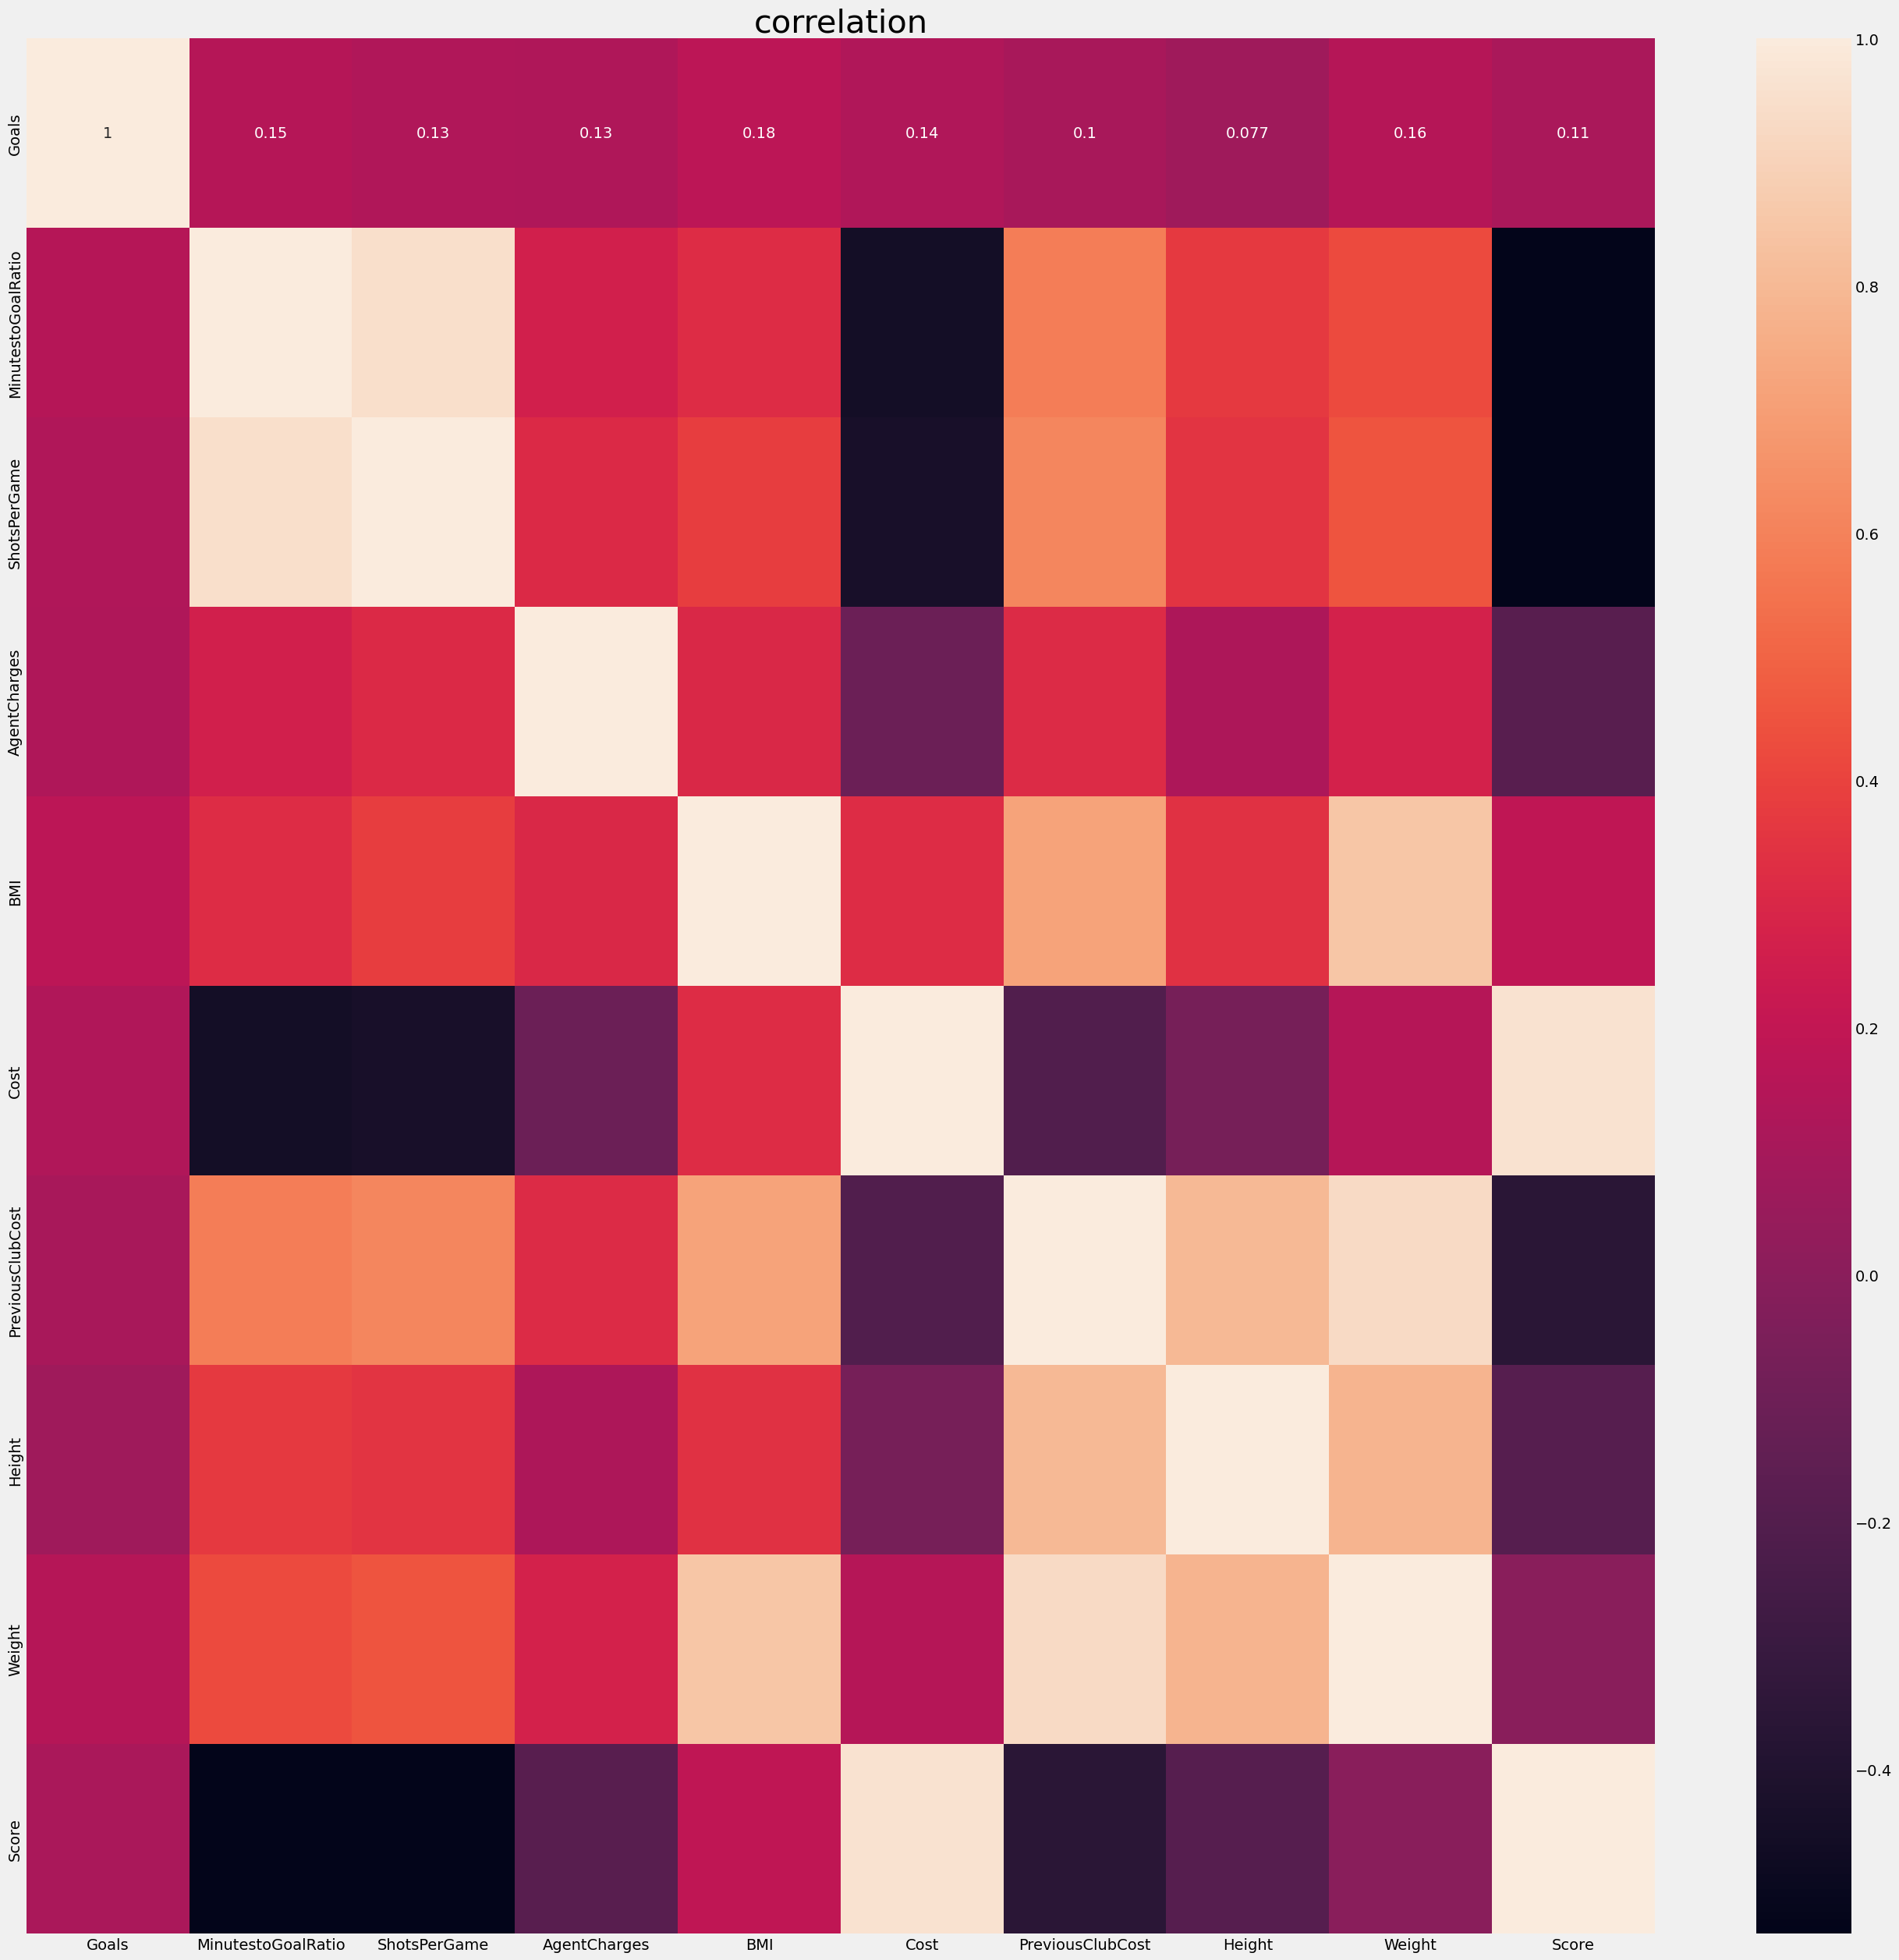

In [23]:
plt.rcParams['figure.figsize'] = (30,30)
sns.heatmap(df.iloc[:,1:].corr(), annot=True)
plt.title('correlation', fontsize=30)
plt.show()

In [24]:
df.iloc[:,1:].corr()['Score']

Goals                 0.108114
MinutestoGoalRatio   -0.532449
ShotsPerGame         -0.531522
AgentCharges         -0.183386
BMI                   0.187558
Cost                  0.963017
PreviousClubCost     -0.361850
Height               -0.188022
Weight               -0.000162
Score                 1.000000
Name: Score, dtype: float64

In [25]:
df.head(2)

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,3.96,7.5,37.5,12.3,60.0,20.56,109.1,63.32,195.9,78.9,19.75
1,4.41,8.3,38.2,12.7,68.0,20.67,102.8,58.55,189.7,74.4,21.30


In [28]:
correlated_features = set()
correlation_matrix = df.corr()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

print("correlated features:", correlated_features)

correlated features: {'ShotsPerGame', 'MinutestoGoalRatio', 'Score', 'Height', 'Weight'}


C:\Users\Shahjahan.DESKTOP-MBDJTPL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Shahjahan.DESKTOP-MBDJTPL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Shahjahan.DESKTOP-MBDJTPL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Shahjahan.DESKTOP-MBDJTPL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

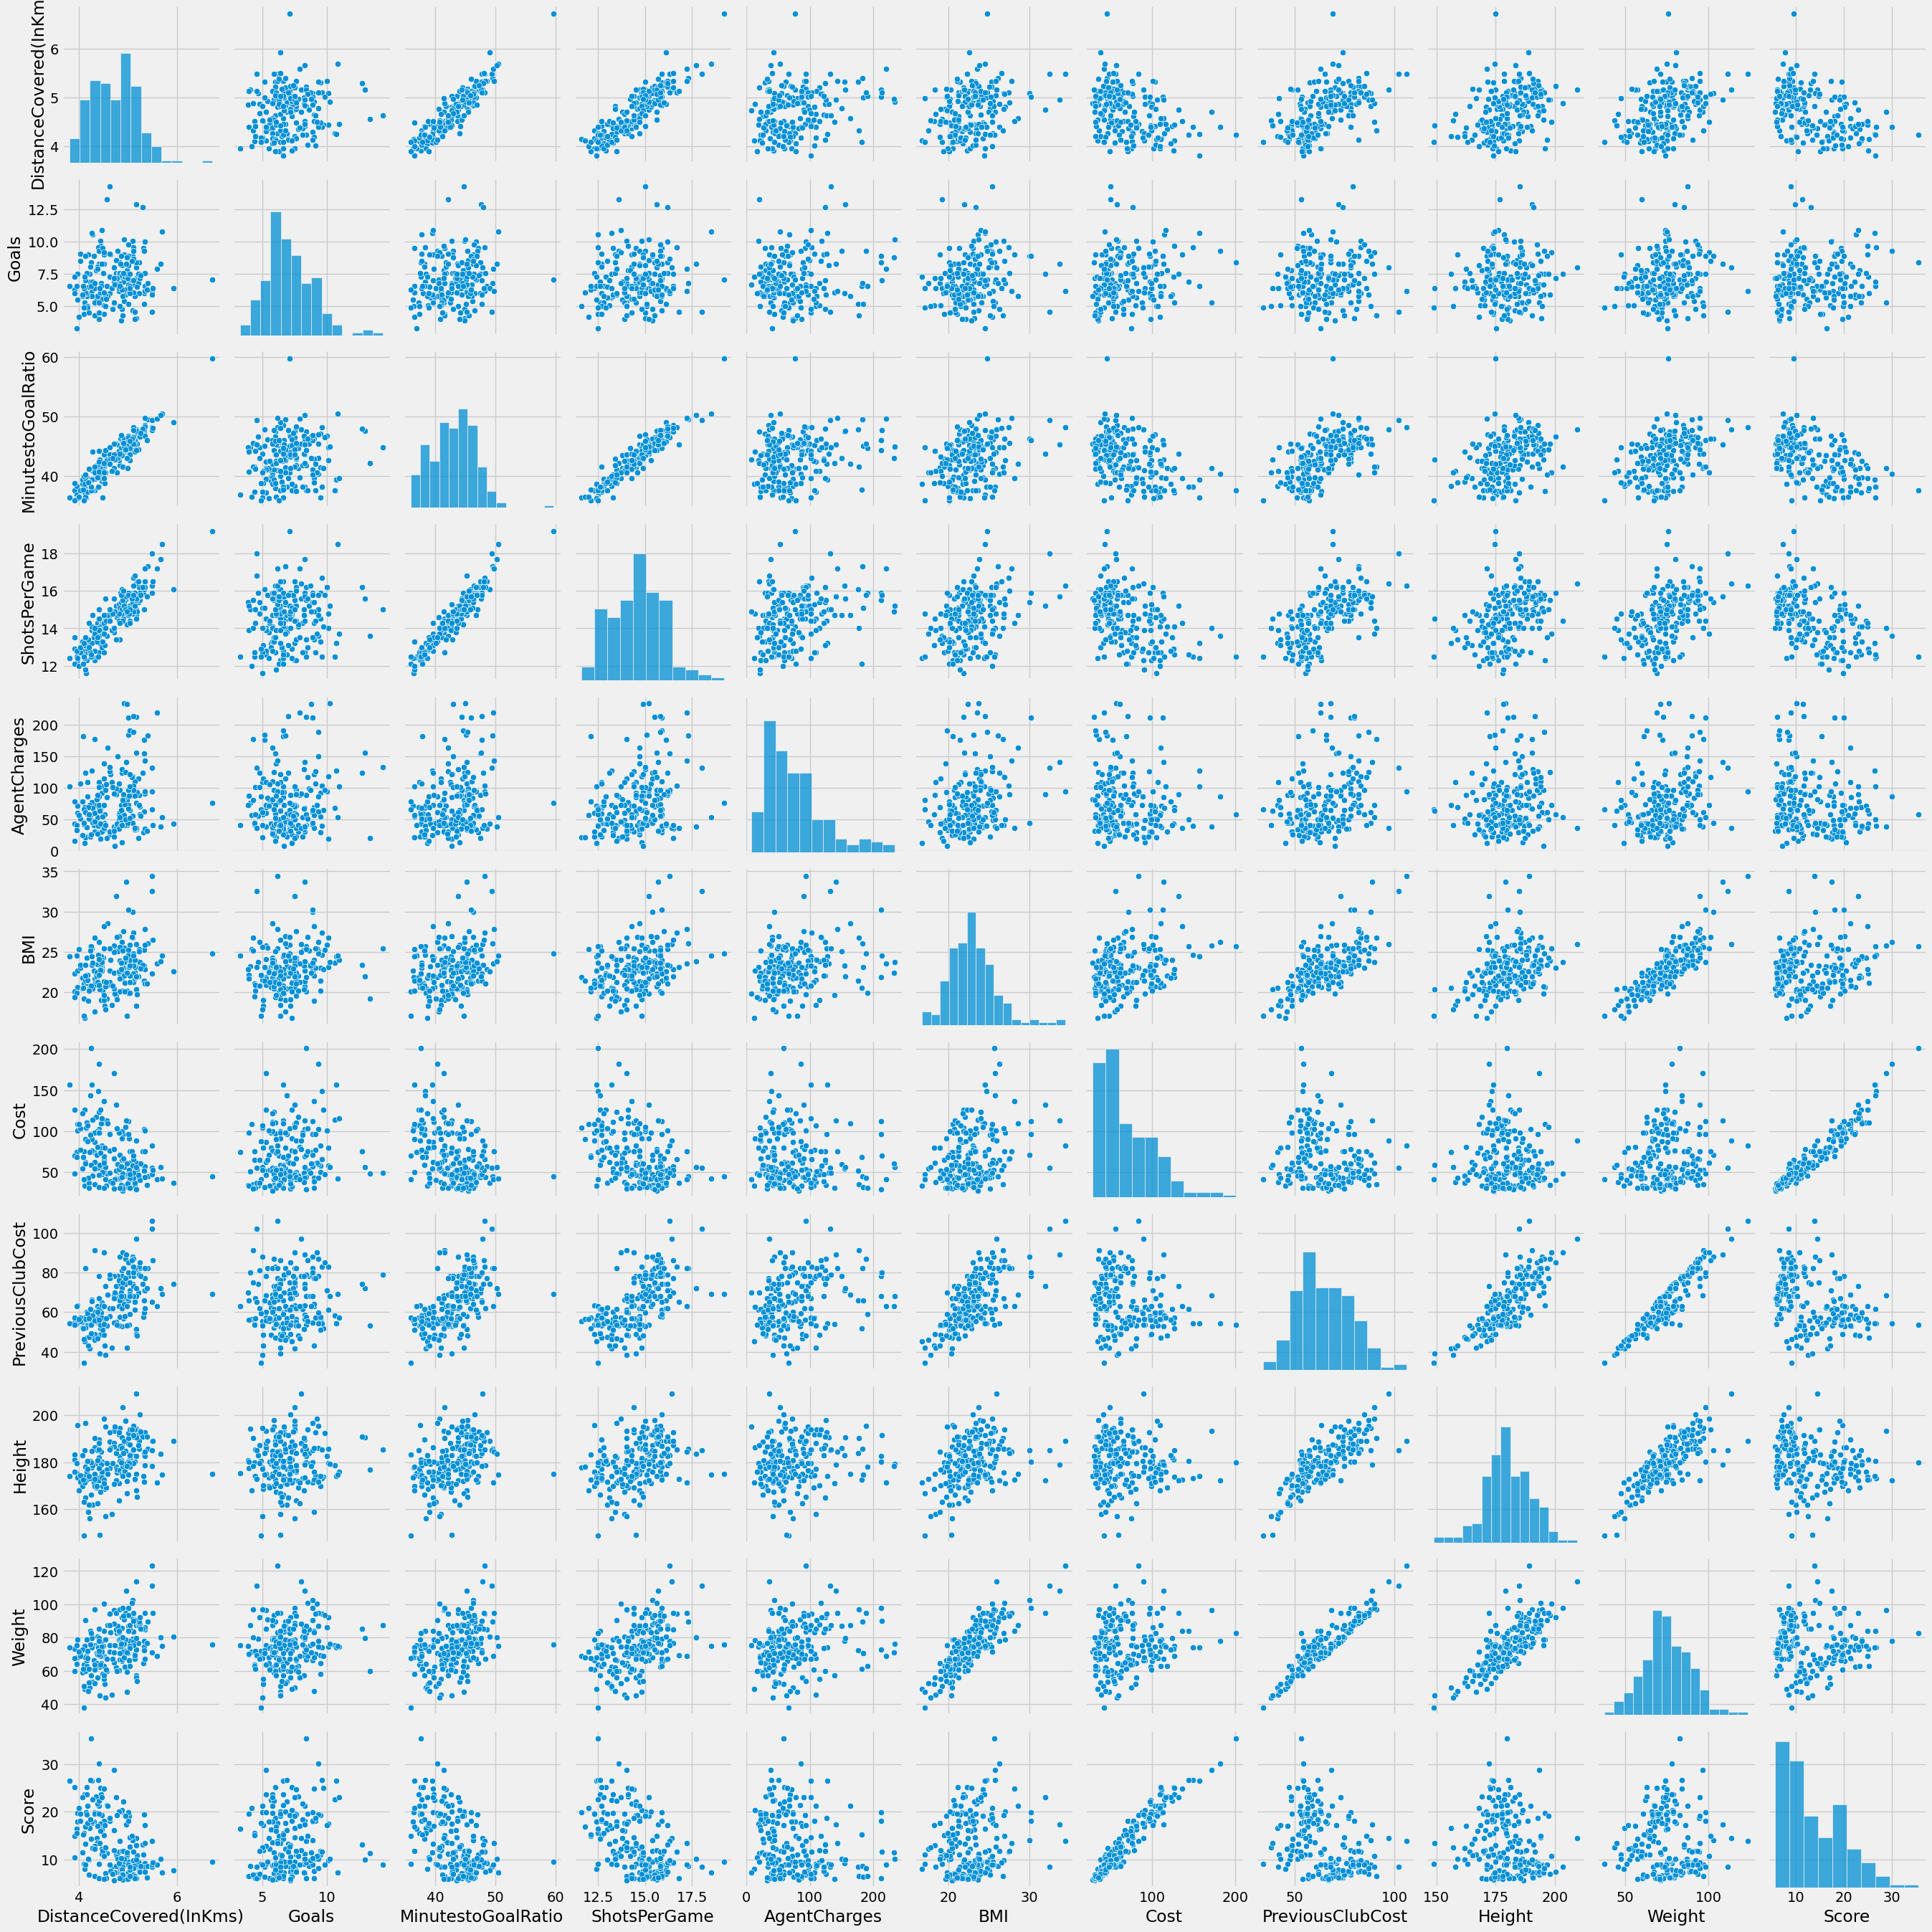

In [29]:
sns.pairplot(df)

In [30]:
df.head()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,3.96,7.5,37.5,12.3,60.0,20.56,109.1,63.32,195.9,78.9,19.75
1,4.41,8.3,38.2,12.7,68.0,20.67,102.8,58.55,189.7,74.4,21.30
2,4.14,5.0,36.4,11.6,21.0,21.86,104.6,55.36,177.8,69.1,19.88
3,4.11,5.3,37.3,12.6,69.0,21.88,126.4,57.18,185.0,74.9,23.66
4,4.45,6.8,41.5,14.0,29.0,18.96,80.3,53.20,184.6,64.6,17.64


In [73]:
X = df.drop('Score', axis=1)
y = df['Score'].to_numpy()

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)
len(X_train), len(y_train), len(X_test), len(y_test)

(161, 161, 41, 41)

In [76]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                    test_size=0.1, 
                                                    random_state=42)
len(X_train), len(y_train), len(X_val), len(y_val)

(144, 144, 17, 17)

In [77]:
from sklearn.pipeline import Pipeline

In [99]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [100]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [125]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge())
])

In [126]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', Ridge())])

In [127]:
pipeline.score(X_train, y_train)

0.9724476292289276

In [128]:
pipeline.score(X_val, y_val)

0.9706597777844661

In [129]:
pipeline.predict([[4.45, 6.8, 41.5, 14.0, 29.0, 19.86, 80.3, 53.20, 184.6, 64.6]])

C:\Users\Shahjahan.DESKTOP-MBDJTPL\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([17.17831068])

In [130]:
from sklearn.metrics import accuracy_score, r2_score

In [131]:
y_preds = pipeline.predict(X_test)
y_preds

array([ 9.18486786, 19.77970191, 19.23889799,  6.84746103, 13.51966337,
        8.72318255, 20.76462984,  9.20386772, 20.26884824, 22.55599087,
       13.60506764,  7.21899787,  7.37718071, 15.62063362, 12.71891496,
       11.36369755, 15.21740141,  6.52428726, 13.71444838, 11.64851997,
        8.72784764, 24.62646782, 17.91901006, 10.85184052, 11.54049709,
       17.67361985, 11.37873125, 11.35735959,  7.19825962,  7.80596945,
       14.67040005, 19.96660341, 37.33722486,  9.75491097,  7.35865777,
        7.04948648, 10.93612627, 10.11604283,  8.17100235, 10.93024444,
        9.93723139])

In [132]:
r2score = r2_score(y_preds, y_test)
print(f"Model Accuracy: {r2score*100:.2f}% - using r2_score (LR model)")

Model Accuracy: 98.00% - using r2_score (LR model)


In [133]:
import pickle

In [134]:
with open("LR-model.pkl",'wb') as f:
    pickle.dump(pipeline, f) 

In [135]:
with open("LR-model.pkl", 'rb') as f:
    model = pickle.load(f)

In [136]:
model.predict([[4.45, 6.8, 41.5, 14.0, 29.0, 19.86, 80.3, 53.20, 184.6, 64.6]])

C:\Users\Shahjahan.DESKTOP-MBDJTPL\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([17.17831068])